In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

In this project we graph the rates of change of the Black-Scholes call and put options, with respect to the time ("theta") and the spot price ("delta"). Below we first visualize the Black-Scholes call option price itself. **WARNING**: The x-axis in the plots measure the time *to expiry*, so if one wants to interpret the value of the call option or the appropriate Greek as the current time *increases*, one should read the graph from right-to-left.

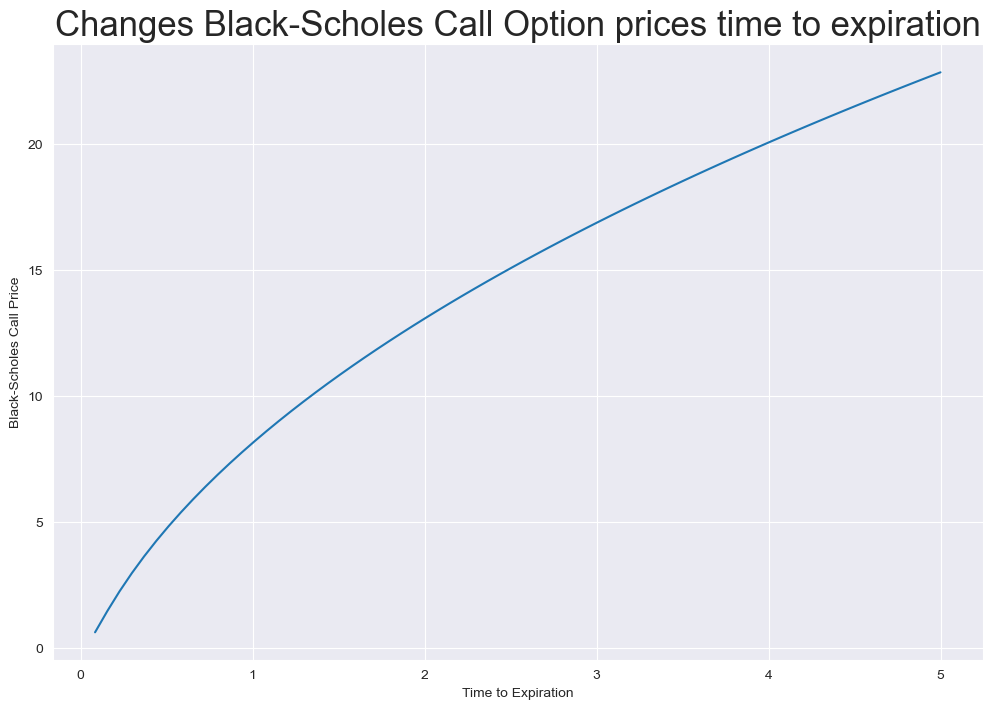

In [7]:

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

Observe as the current time increases (i.e., the time to expiry decreases from right-to-left), the value of the call option decreases. This is consistent with the idea that call options are insurance contracts: since the spot price $S_0 = 100$ is less than the strike price $K = 110$, the call option is said to be *out-of-the-money*, and the option holder would lose money if they choose to exercise the option. As the expiration time nears, there is even less time for the option to be *in-the-money*, and so its value decreases drastically.

Now we visualize the theta for the call option price. Recall that the theta is the rate of change with respect to time. That is, 
$\Theta_{C_0} = \frac{\partial C_0}{\partial t}$.

We use the same spot price, strike price, volatility, and risk-free interest rate. We will overlay it with the actual call price.

In [9]:
def bs_call_theta(S0,K,sigma,t,r=0):
    """
    Returns the theta (rate of change with respect to time) of a European call option
    under Black-Scholes assumptions.
    
    
    To give daily theta, divide return by 252.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Theta of Call option
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    return (-S0*norm.pdf(d1)*sigma)/(2*np.sqrt(t)) - r*K*np.exp(-r*t)*norm.cdf(d2)

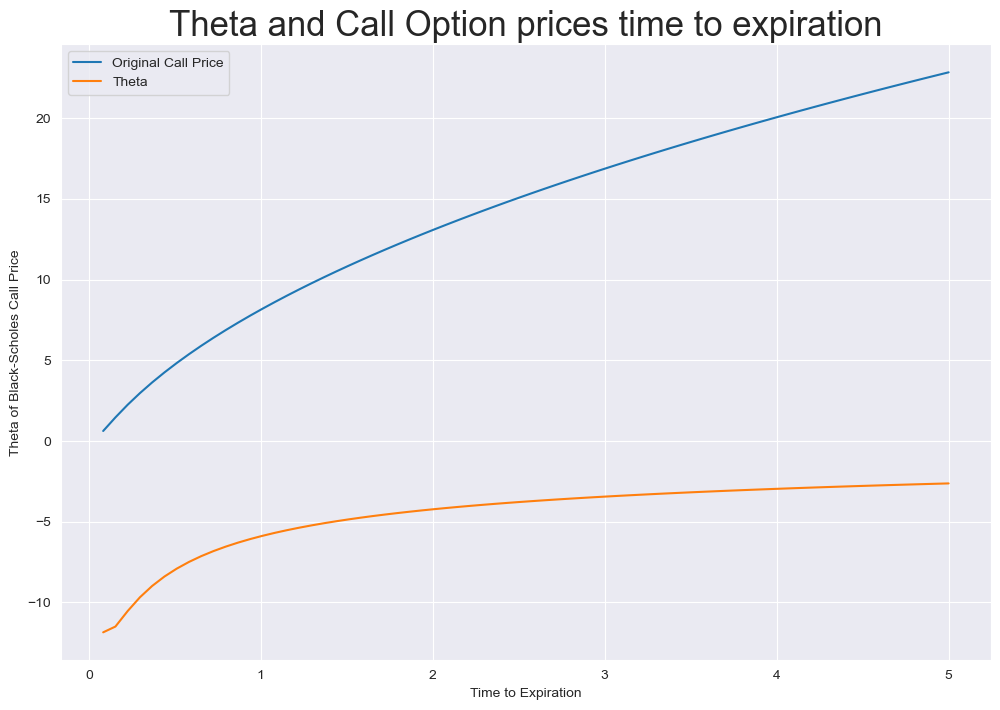

In [10]:
thetas = [bs_call_theta(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (12,8))
plt.title('Theta and Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices, label='Original Call Price')
plt.plot(times, thetas, label='Theta')
plt.xlabel('Time to Expiration')
plt.ylabel('Theta of Black-Scholes Call Price')
plt.legend()
plt.show()

Notice that the theta is negative and generally remains constant until the current time becomes very close to expiry, where it then drastically decreases. The fact that theta starts off negative is consistent with the idea that the value of the call option decreases (almost linearly in this example) with time.

Now we will analyze the dependence on the spot price $S_0$. Below we have a function that returns the delta of the call option:

$\Delta_{C_0} = \frac{\partial C}{\partial S_0}$.

In [13]:
def bs_call_delta(S0, K, sigma, t, r=0):
    """
    Returns the Delta (sensitivity to spot price) of a European call option
    under Black-Scholes assumptions.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Delta of Call Option
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.cdf(d1)

First let us plot the dependence of the Black-Scholes call price on $S_0$ itself. We try a variety of spot prices, including those above, below, and equal to one fixed strike price.

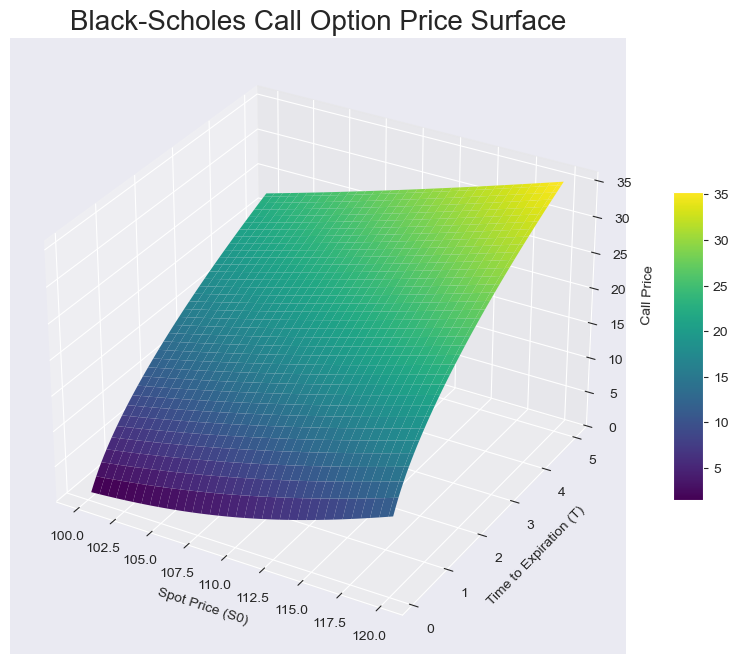

In [15]:
from mpl_toolkits.mplot3d import Axes3D

K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)
spotprices = np.linspace(100, 120, 70)
T, S = np.meshgrid(times, spotprices)
Z = np.vectorize(bs_call)(S, K, sigma, T) 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S, T, Z, cmap='viridis', edgecolor='none')

ax.set_title('Black-Scholes Call Option Price Surface', size=20)
ax.set_xlabel('Spot Price (S0)')
ax.set_ylabel('Time to Expiration (T)')
ax.set_zlabel('Call Price')

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

Now we overlay the plot with the delta.

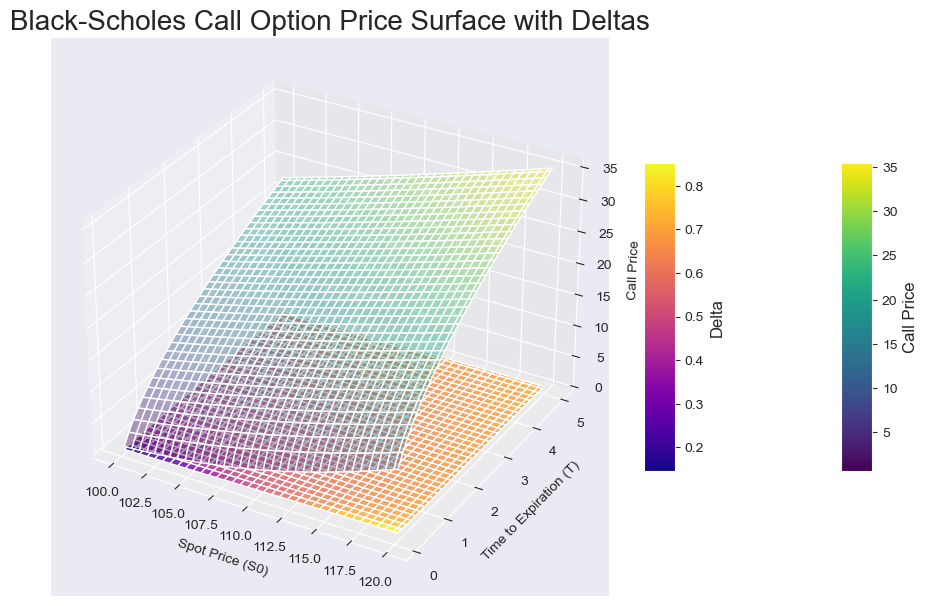

In [17]:
W = np.vectorize(bs_call_delta)(S, K, sigma, T)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(S, T, Z, cmap='viridis', alpha=0.4)
surf2 = ax.plot_surface(S, T, W, cmap='plasma', alpha=0.8)
ax.set_title('Black-Scholes Call Option Price Surface with Deltas', size=20)
ax.set_xlabel('Spot Price (S0)')
ax.set_ylabel('Time to Expiration (T)')
ax.set_zlabel('Call Price')

mappable1 = plt.cm.ScalarMappable(cmap='viridis')
mappable1.set_array(Z)
cbar1 = fig.colorbar(mappable1, ax=ax, shrink=0.5, aspect=10, pad=0.1)
cbar1.set_label('Call Price', size=12)

mappable2 = plt.cm.ScalarMappable(cmap='plasma')
mappable2.set_array(W)
cbar2 = fig.colorbar(mappable2, ax=ax, shrink=0.5, aspect=10, pad=0.05)
cbar2.set_label('Delta', size=12)

plt.show()

One observation is that as the spot price increases, the delta increases. The biggest change appears closer to expiry: we see that a spot price lower than the strike price yields a lower delta, whereas a higher spot price yields a higher delta. This is consistent with the idea that the value of the call option is directly correlated with the spot price: as the spot price increases, the call option value also increases, and vice versa. Moreover, the closer the spot price is to the strike price (the price where the option can be exercised), the more valuable the call option becomes.

The delta represents the "rate of change with respect to spot price." We can also plot the theta (the rate of change with respect to time) as a function of spot price itself.

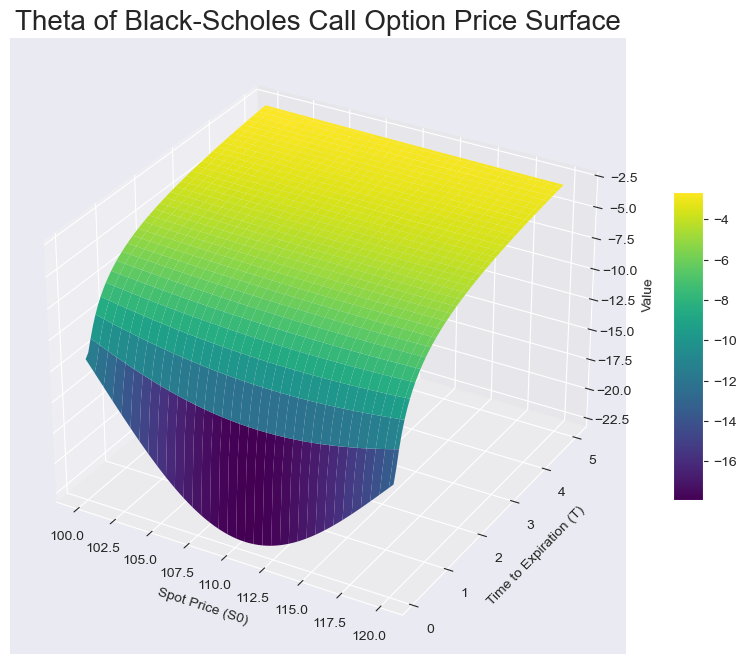

In [20]:
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)
spotprices = np.linspace(100, 120, 70)
T, S = np.meshgrid(times, spotprices)
Z = np.vectorize(bs_call_theta)(S, K, sigma, T) 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S, T, Z, cmap='viridis', edgecolor='none')

ax.set_title('Theta of Black-Scholes Call Option Price Surface', size=20)
ax.set_xlabel('Spot Price (S0)')
ax.set_ylabel('Time to Expiration (T)')
ax.set_zlabel('Value')

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

The most observable behavior is at time of expiry. When the spot price equals the strike price, i.e., the option is most *at-the-money*, the theta is most negative. When the spot price is far greater than the strike price (*far in-the-money*), or far less than the strike price (*far out-of-the-money*), the theta becomes less negative. Options that are far in-the-money behave more like the underlying asset, so their time value is small (less decay). Options that are far out-of-the-money are unlikely to become profitable, so they also have low time value (less decay). However, options that are near-the-money have the highest time value, and they lose this the fastest -- hence the most negative theta. Indeed, we can numericallly observe this from the formula

$\Theta_c = -\frac{S_0\sigma\phi(d_1)}{2\sqrt{t}} - rKe^{-rt}\Phi(d_2)$

where $\phi$ is the standard normal density function, $\Phi$ is the standard normal cumulative distribution function, $d_1 = \frac{ln(S_0/K)+(r+\sigma^2/2)t}{\sigma\sqrt{t}}$, $d_2 = d_1 - \sigma\sqrt{t}$, $r$ is risk-free interest rate (in plot above, $r = 0$), $\sigma$ is volatility, $K$ is the strike price, and $S_0$ is the spot price. Indeed, let us fix a time and plot the dependence on spot price alone.

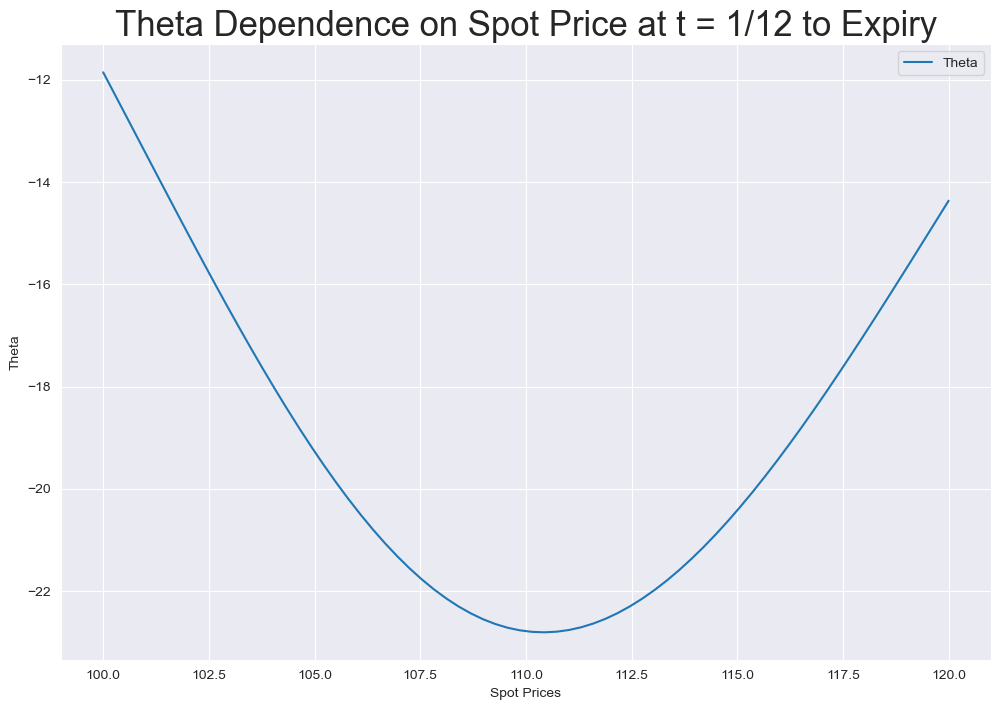

In [22]:
thetas = [bs_call_theta(spotprices[i],K,sigma, t = 1/12) for i in range(len(spotprices))]

plt.figure(figsize = (12,8))
plt.title('Theta Dependence on Spot Price at t = 1/12 to Expiry', size = 25)
plt.plot(spotprices, thetas, label='Theta')
plt.xlabel('Spot Prices')
plt.ylabel('Theta')
plt.legend()
plt.show()

As time to expiry decreases to $0$, one observes that the theta dependence on spot price tends from linear to almost quadratic with the
minimum being obtained when the spot price equals the strike price.

Now we repeat the above visualizations with the put options instead.

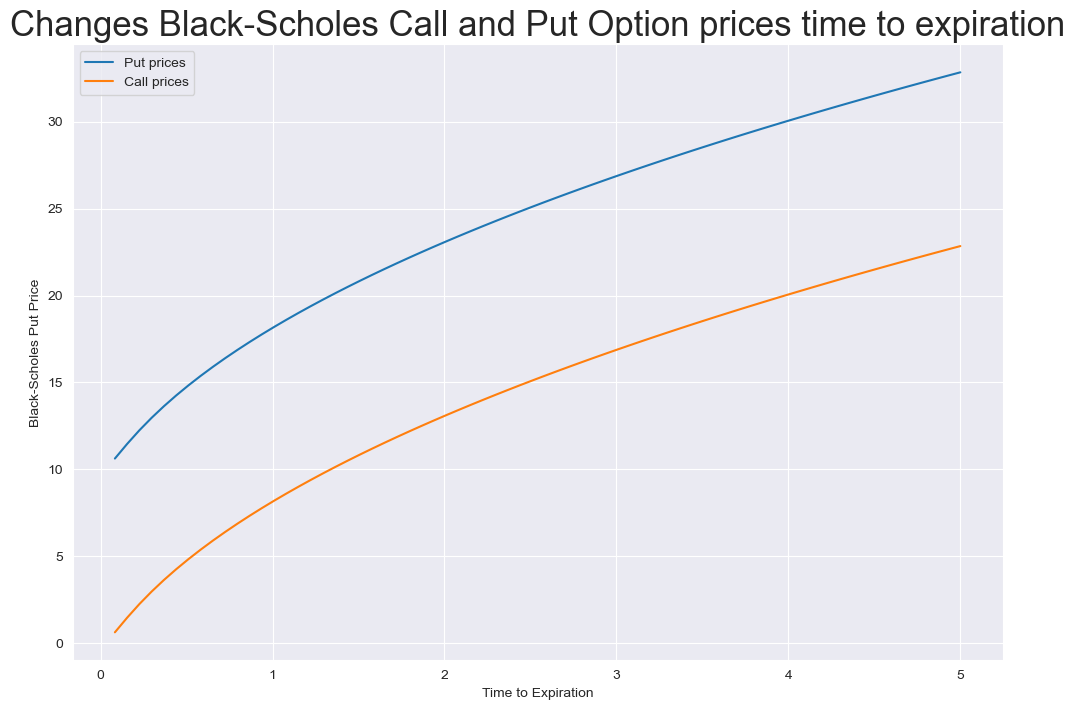

In [25]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]
call_prices = [bs_call(S0,K,sigma,t=times[i]) for i in range(len(times))]

plt.figure(figsize = (12,8))
plt.title('Call and Put Option prices time to expiration with no interest rate', size = 25)
plt.plot(times, put_prices, label="Put prices")
plt.plot(times, call_prices, label="Call prices")
plt.legend()
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

Recall we have the following put-call parity: 
$C - P = S_0 - Ke^{-rT}$
where $T$ is time to expiry. The above plots are when the risk-free interest rate $r$ is equal to $0$. The plots then differ by exactly the difference between spot price and strike price $S_0 - K$. We now plot them when $r$ is non-zero, say $r=1$.

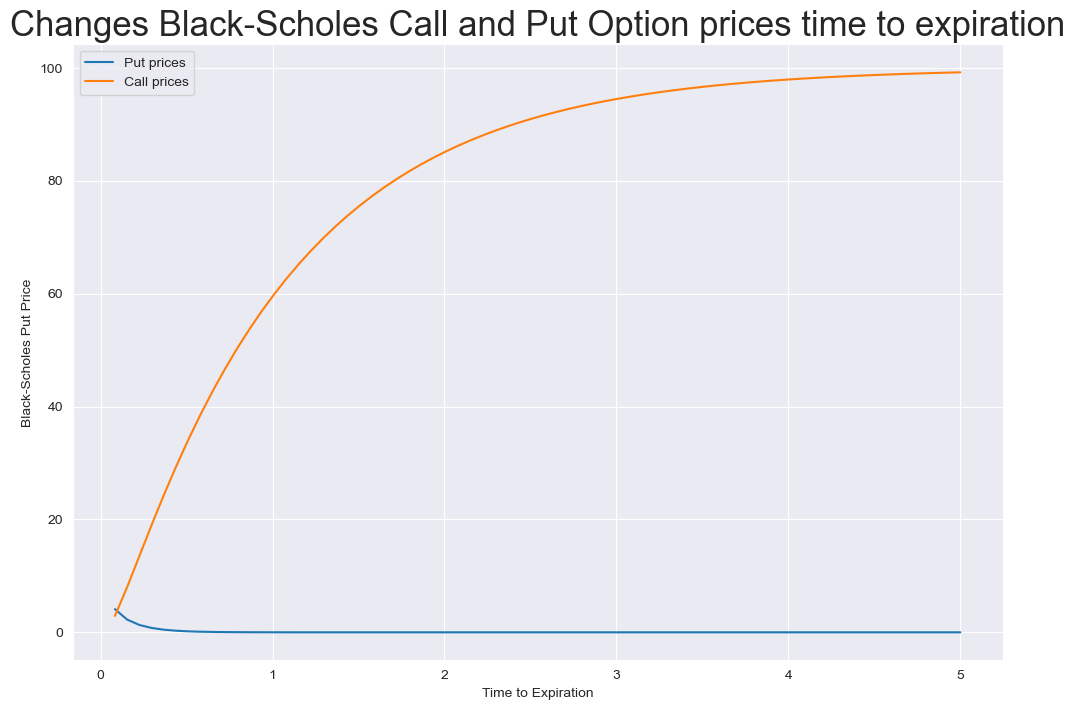

In [82]:
put_prices = [bs_put(S0,K,sigma, t = times[i], r=1) for i in range(len(times))]
call_prices = [bs_call(S0,K,sigma,t=times[i],r=1) for i in range(len(times))]

plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call and Put Option prices time to expiration', size = 25)
plt.plot(times, put_prices, label="Put prices")
plt.plot(times, call_prices, label="Call prices")
plt.legend()
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

Now we see a qualitatively key difference between the behaviors of the call and put option prices. As time to expiry decreases (i.e., as time gets nearer to time of expiry), the call price decreases drastically whereas the put price increases sharply. The explanation is as follows: since the interest rate $r$ is positive, the owner of the call option can take advantage of time by investing $Ke^{-rT}$ now, and letting it grow to the strike price, and using it to pay the strike price at expiry. This is cheaper than paying $K$ in the current moment. But as time passes, the owner has less time to invest, and so the call option price decreases in value.

On the other hand, a put option gives you the right to sell for $K$, and so the originally discounted put option price sharply increases closer to expiry. A simple analogy would be: if you are promised $ \$100$ in five years, then that is not particularly exciting as the time is far away. But if you were then told that this money would come in two minutes, the value of the *promise* sharply increases.

Below we plot the thetas of the puts and calls, again with interest rate $r = 1$. The graphs are consistent with the plots above.

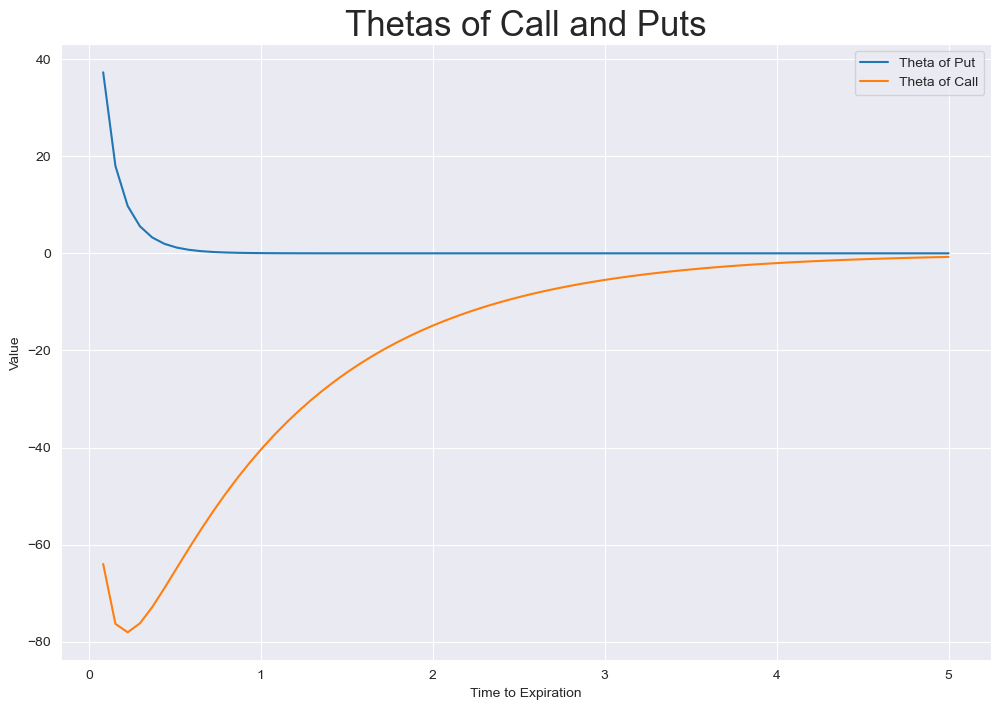

In [50]:
def bs_put_theta(S0,K,sigma,t,r=0):
    """
    Returns the theta (rate of change with respect to time) of a European put option
    under Black-Scholes assumptions.
    
    
    To give daily theta, divide return by 252.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Theta of Put option
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    return (-S0*norm.pdf(d1)*sigma)/(2*np.sqrt(t)) + r*K*np.exp(-r*t)*norm.cdf(-d2)


call_thetas = [bs_call_theta(S0,K,sigma, t = times[i], r= 1) for i in range(len(times))]
put_thetas = [bs_put_theta(S0,K,sigma, t = times[i], r=1) for i in range(len(times))]

plt.figure(figsize = (12,8))
plt.title('Thetas of Call and Puts', size = 25)
plt.plot(times, put_thetas, label='Theta of Put')
plt.plot(times, call_thetas, label='Theta of Call')
plt.xlabel('Time to Expiration')
plt.ylabel('Value')
plt.legend()
plt.show()

We now analyze the delta of the puts. We repeat as we did for the calls, first analyzing the dependence of the puts on spot price, and overlaying it with the deltas. We also let $r=0.5$.

In [57]:
def bs_put_delta(S0, K, sigma, t, r):
    """
    Returns the Delta (sensitivity to spot price) of a European put option
    under Black-Scholes assumptions.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Delta of Put Option
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.cdf(d1) - 1.


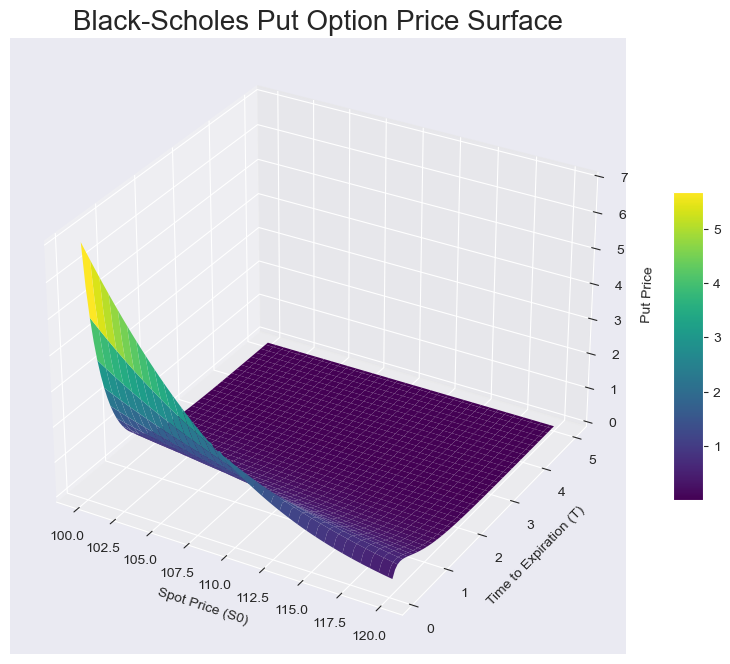

In [67]:
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)
spotprices = np.linspace(100, 120, 70)
T, S = np.meshgrid(times, spotprices)
Z = np.vectorize(bs_put)(S, K, sigma, T,r=0.5) 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S, T, Z, cmap='viridis', edgecolor='none')

ax.set_title('Black-Scholes Put Option Price Surface', size=20)
ax.set_xlabel('Spot Price (S0)')
ax.set_ylabel('Time to Expiration (T)')
ax.set_zlabel('Put Price')

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

Now with the deltas.

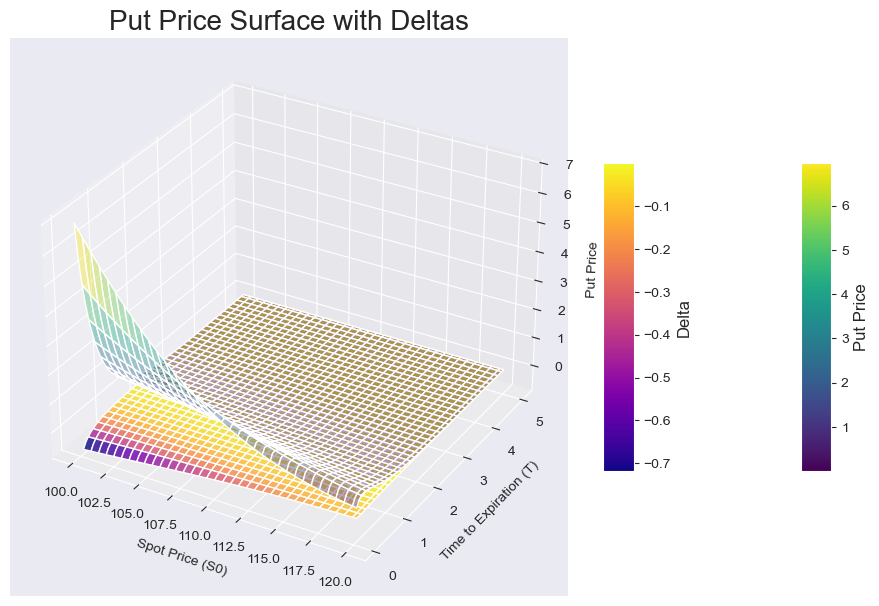

In [69]:
W = np.vectorize(bs_put_delta)(S, K, sigma, T,r=0.5)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(S, T, Z, cmap='viridis', alpha=0.4)
surf2 = ax.plot_surface(S, T, W, cmap='plasma', alpha=0.8)
ax.set_title('Put Price Surface with Deltas', size=20)
ax.set_xlabel('Spot Price (S0)')
ax.set_ylabel('Time to Expiration (T)')
ax.set_zlabel('Put Price')

mappable1 = plt.cm.ScalarMappable(cmap='viridis')
mappable1.set_array(Z)
cbar1 = fig.colorbar(mappable1, ax=ax, shrink=0.5, aspect=10, pad=0.1)
cbar1.set_label('Put Price', size=12)

mappable2 = plt.cm.ScalarMappable(cmap='plasma')
mappable2.set_array(W)
cbar2 = fig.colorbar(mappable2, ax=ax, shrink=0.5, aspect=10, pad=0.05)
cbar2.set_label('Delta', size=12)

plt.show()

Delta increases as spot price increases, while remaining largely uniform with respect to time except when the spot price is below the strike price. The delta of the put behaves opposite to the put itself, when the spot price is lower than the strike price (out-of-the-money), as in this case the put value is greatly increased. Below we plot the theta dependence on spot price and, as in the fixed spot price case, we see that its behavior mimics that of the actual put value.

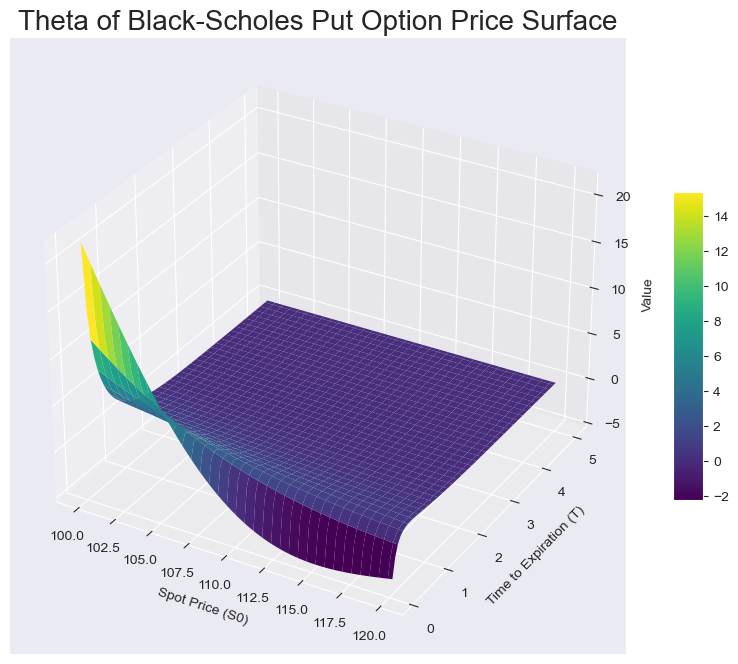

In [72]:
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)
spotprices = np.linspace(100, 120, 70)
T, S = np.meshgrid(times, spotprices)
Z = np.vectorize(bs_put_theta)(S, K, sigma, T, r=0.5) 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S, T, Z, cmap='viridis', edgecolor='none')

ax.set_title('Theta of Black-Scholes Put Option Price Surface', size=20)
ax.set_xlabel('Spot Price (S0)')
ax.set_ylabel('Time to Expiration (T)')
ax.set_zlabel('Value')

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

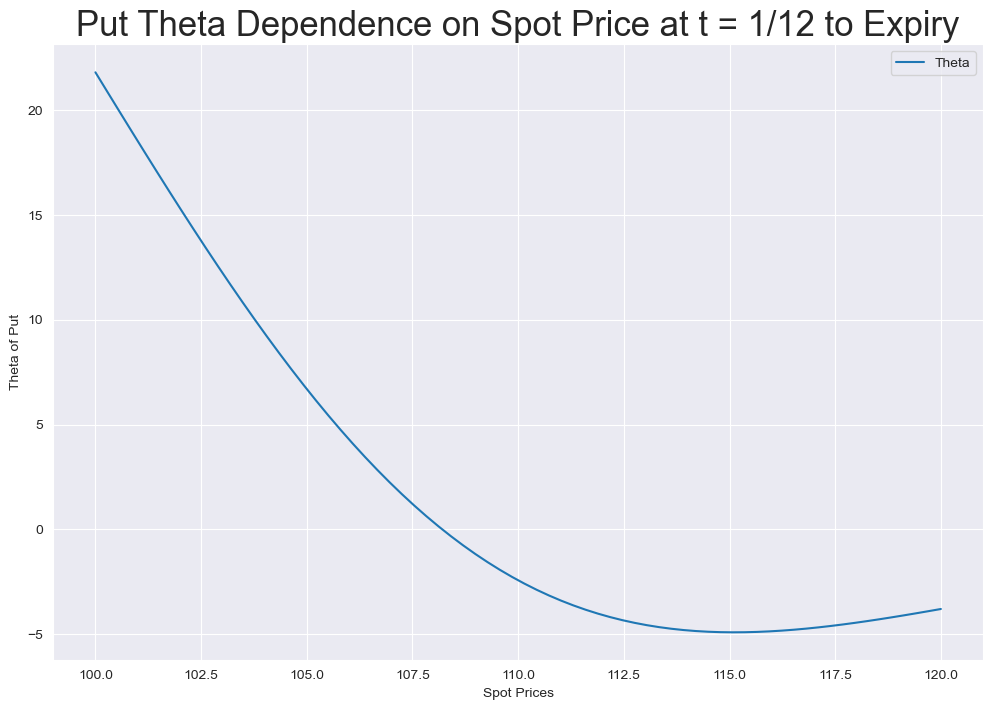

In [78]:
thetas = [bs_put_theta(spotprices[i],K,sigma, t = 1/12, r=0.5) for i in range(len(spotprices))]

plt.figure(figsize = (12,8))
plt.title('Put Theta Dependence on Spot Price at t = 1/12 to Expiry', size = 25)
plt.plot(spotprices, thetas, label='Theta')
plt.xlabel('Spot Prices')
plt.ylabel('Theta of Put')
plt.legend()
plt.show()

This last graphic is the last slice in theta surface at the time of expiry. We conclude with some observations:

For a **call option** $C_0$, we see that as time nears expiry, its value decreases. However, its value *increases* with an increase in spot price. According to the call option surface graph, its value is greatest when there is the most time to expiry, and we are the most in-the-money (i.e., spot price is far greater than strike price). As time nears expiry or spot price decreases, the call option value decreases.

*Call Option – Time Sensitivity: decreases as time nears expiry*

*Call Option – Spot Price Sensitivity: increases as spot price increases*

For a **put option** $P_0$, we see that as time nears expiry, *assuming a positive interest rate $r$*, the value increases as time nears expiry. If $r = 0$, then the put option behaves identically as the call option (up to a constant), by the put-call parity. Similarly, the value of the put decreases as spot price increases, so that the value of the put is maximized when we are most out-of-the-money.

*Put Option – Time Sensitivity: assuming $r > 0$, increases as time nears expiry*

*Put Option – Spot Price Sensitivity: assuming $r > 0$, decreases as spot price increases*